<img src = "https://www.pucsp.br/sites/default/files/download/brasao-PUCSP-assinatura-principal-RGB.png" width="6%"/>

*Integrantes*
<table align="left">
    <tr>
        <td>Nome:</td>
        <td><b>Beatriz Gil</b></td>
        <td>RA:</td>
        <td><b>RA00297693</b></td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td><b>Lucas Gregorio</b></td>
        <td>RA:</td>
        <td><b>RA00297813</b></td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td><b>Vinícius Perez</b></td>
        <td>RA:</td>
        <td><b>RA00297669</b></td>
    </tr>
</table>


## Bibliotecas

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ssl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
from PIL import Image
import torchvision.transforms as transforms
import pandas as pd
import torch
warnings.filterwarnings("ignore")

## Autentificação SSL

Para rodar o dataset do MNIST é necessário utilizar esse codigo, pois a biblioteca não tem um certificado de SSL confiável (é necessário rodar apenas 1 vez)

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

## Conjunti de dados MNIST

 Nesse conunto de dados abaixo (mnist_784), cada linha representa uma imagem de um dígito escrito à mão, e cada coluna representa um pixel dessa imagem (cada imagem possui 28x28 pixels), ou seja, 784 pixels, onde cada coluna é 1 pixel (Onde cada pixel representa uma intensidade que varia de 0 a 255, ou seja, 0 representa a cor preta e 255 representa a cor branca)

In [3]:
mnist = fetch_openml('mnist_784')

Criando um DataFrame para vermos melhor as colunas de intensidade dos pixels e a coluna target, onde mostra qual número escrito a mão representa cada linha

In [4]:
df_mnist = pd.DataFrame(data=mnist['data'], columns=mnist['feature_names'])
df_mnist['target'] = mnist['target']
df_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


## Analisando o Conjunto de dados

5 primeiros números de cada classe

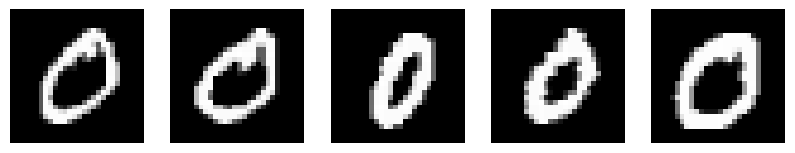

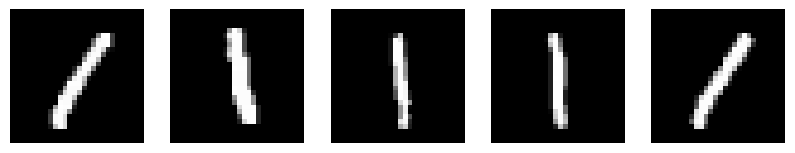

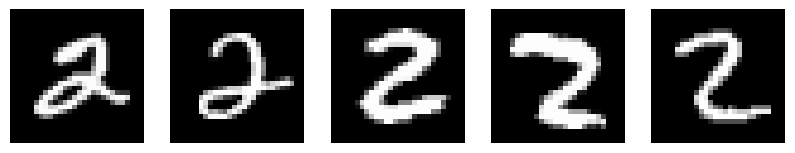

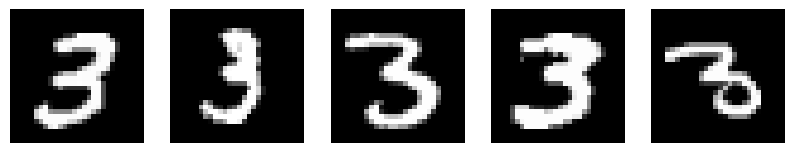

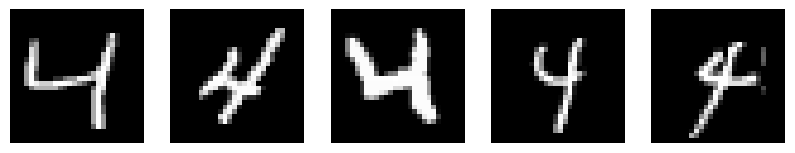

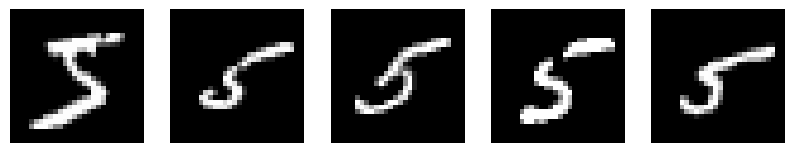

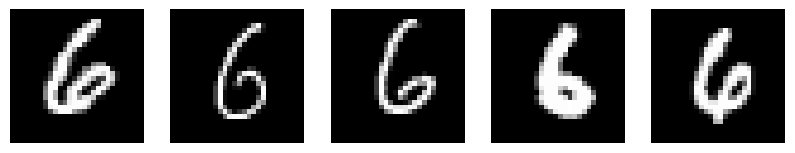

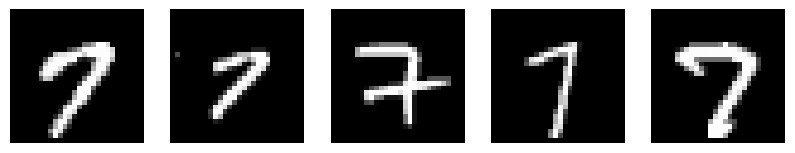

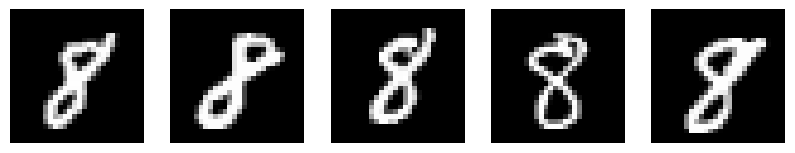

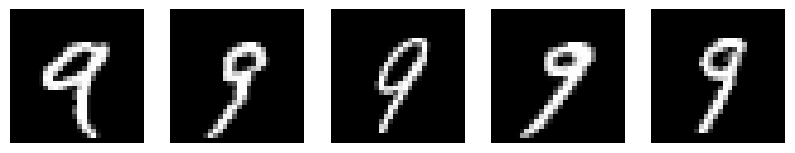

In [5]:
for i in range(10):
    num_indices = np.where(mnist.target == str(i))[0][:5]
    fig, ax = plt.subplots(1, 5, figsize=(10, 10))
    for img in range(5):
        ax[img].imshow(mnist.data.iloc[num_indices[img]].to_numpy().reshape(28, 28), cmap='gray')
        ax[img].axis('off')
    plt.show()

Quantidade de linhas que cada número no target possui (os números são de 0 a 9)

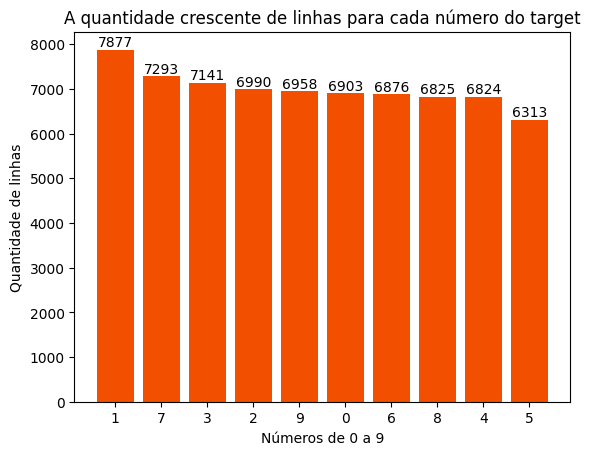

In [6]:
qtd_numeros = df_mnist['target'].value_counts()

plt.bar(qtd_numeros.index, qtd_numeros.values, color='#F24F00')
plt.title('A quantidade crescente de linhas para cada número do target')
plt.xlabel('Números de 0 a 9')
plt.ylabel('Quantidade de linhas')

for i, v in enumerate(qtd_numeros.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

Ordem decrescente de intensidade dos pixels por cada número do target, com a soma de maior intensidade (somando todas as linhas de cada grupo de número)

obs: Apenas para termos noção, pois a quantidade de linhas de cada número do target de 0 a 9 não é igual em nenhum dos números (qtd_numeros)

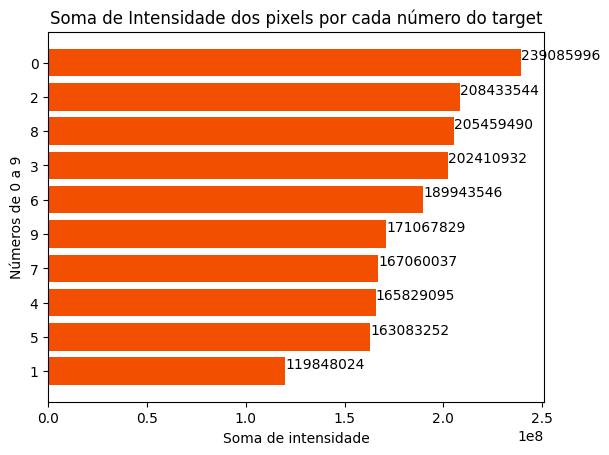

In [7]:
soma_intensidade = np.sum(df_mnist, axis=1)
num_ordenados_intensidade = df_mnist.groupby('target').sum().sum(axis=1).sort_values(ascending=True)

plt.barh(num_ordenados_intensidade.index, num_ordenados_intensidade.values, color='#F24F00')
plt.title("Soma de Intensidade dos pixels por cada número do target")
plt.xlabel("Soma de intensidade")
plt.ylabel("Números de 0 a 9")

for i, v in enumerate(num_ordenados_intensidade.values):
    plt.text(v + 0.1, i, str(int(v)), va='bottom')
    
plt.show()


Calcula a variância da intensidade dos pixels para cada número do target de 0 a 9, para entendermos como a intensidade dos pixels varia dentro de cada número e compararmos a distribuição de intensidade dos pixels entre os números.

- Se a variância da intensidade dos pixels de um determinado número for muito alta, isso pode indicar que o número tem regiões com intensidades muito diferentes e possivelmente mais difícil de ser reconhecido por algoritmos de aprendizado de máquina. 
- Se a variância da intensidade dos pixels de um número for baixa, isso pode indicar que o número tem uma intensidade de pixel mais uniforme e, portanto, mais fácil de ser reconhecido.

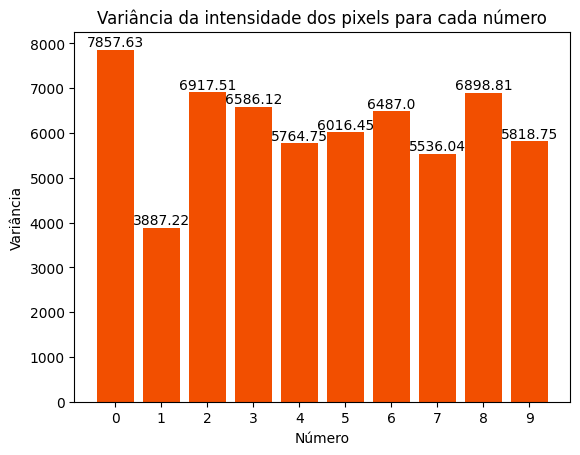

In [8]:
variancias = []
for i in range(10):
    intensidades = df_mnist[df_mnist['target'] == str(i)].iloc[:, :-1].values
    variancia = np.var(intensidades)
    variancias.append(variancia)

numeros = [str(i) for i in range(10)]
plt.bar(numeros, variancias, color='#F24F00')
plt.title('Variância da intensidade dos pixels para cada número')
plt.xlabel('Número')
plt.ylabel('Variância')

for i, v in enumerate(variancias):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
    
plt.show()


## Modelo de Rede Neual usando o Pytorch

Definir qual será o X e o Y, onde:
- X: Contém os pixels de cada imagem, possuindo 784 colunas/ pixels, ou seja, cada imagem representa um matriz de 28x28 pixels (28 linhas e 28 colunas)
- Y: Contém a identificação de cada imagem, indicando qual número de 0 a 9 a imagem representa

In [9]:
X = mnist.data.to_numpy().astype('float32')
y = mnist.target.to_numpy().astype('int64')

Dividimos cada valor de pixel por 255 para que o intervalo de valores fique entre 0 e 1

In [10]:
X /= 255.0

Padronização dos dados, para que cada pixel tenha aproximadamente a mesma escala de valores

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Dividindo valores de treino e teste

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Transformar os dados em tensores (é necessário quando se trabalha com PyTorch)

In [13]:
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

Não é necessário usar "TensorDataset" e "DataLoader", mas é indicado quando se trabalha com um conjunto de dados  grande e complexo, pois melhora a eficiência e desempenho do treinamento do modelo

TensorDataset: Cria um conjunto de dados a partir de tensores de dados e seus respectivos rótulos
DataLoader: Divide os dados em lotes para um processamento mais eficiente, além de avaliar a precisão do modelo e evitar o superajuste

In [14]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

Utilizando 6 camadas: 
- 1 camada linear: Contém 784 neurônios de entrada (respectivamente todas as colunas do dataset), com 256 neurônios de saída
- 2 camada linear: Contém os 256 neurônios de entrada (saídas da 1 camada) e 128 neurônios de saída
- 3 camada linear: Contém os 128 neurônios de entrada (saídas da 2 camada) e 64 neurônios de saída
- 4 camada linear: Contém os 64 neurônios de entrada (saídas da 3 camada) e 32 neurônios de saída
- 5 camada linear: Contém os 32 neurônios de entrada (saídas da 4 camada) e 16 neurônios de saída
- 6 camada linear: Contém os 16 neurônios de entrada (saídas da 5 camada) e 10 neurônios de saída (que corresponde às 10 classes possíveis do target

Aplicando a função de ativação ReLu (Caso o valor de entrada for negativo, a função retornará 0, mas caso contrário, retornará o próprio valor de entrada)

Utilizando o nn.Sequential para criar uma rede neural com camadas sequenciais, ou seja, uma camada conectada à outra

In [15]:
modelo = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(16, 10),
    nn.LogSoftmax(dim=1))

Utilizando o otimizador Adam, pois é um dos algoritmos mais populares para otimização de redes neurais, e defini os seguintes parâmetros:
- lr = 0.001 pois quanto mais baixo, significa que a rede neural fará ajustes menores nos pesos a cada atualização
- eps = 1e-08, para evitar a divisão por zero e garantir a estabilidade numérica do algoritmo, e usei 1e-08 pois é um valor padrão muito pequeno adicionado para evitar erros numéricos
- betas = (0.9, 0.999), utilizei os valores padrões de beta1 (0.9) e beta2 (0.999), pois é uma técnica utilizada em deep learning para atualizar os pesos do modelo durante o treinamento,

In [16]:
otimizador_Adam = torch.optim.Adam(modelo.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

A funcao de perda é usada para calcular a diferença entre a saída real e a saída esperada do modelo, em que é usada para ajustar os parâmetros do modelo durante o treinamento

In [17]:
funcao_perda = nn.CrossEntropyLoss()

Treinamento do modelo

In [28]:
num_epoca = 15

for epoca in range(num_epoca):
    running_loss = 0.0001
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        otimizador_Adam.zero_grad()
        outputs = modelo(inputs)
        loss = funcao_perda(outputs, labels)
        loss.backward()
        otimizador_Adam.step()
        running_loss += loss.item()
        
    qtd_previsoes_corretas_treino = 0
    total_treino = 0
    with torch.no_grad():
        for train in train_loader:
            inputs, labels = train
            outputs = modelo(inputs)
            valor_maximo, previsoes = torch.max(outputs.data, 1)
            total_treino += labels.size(0)
            qtd_previsoes_corretas_treino += (previsoes == labels).sum().item()
    
    qtd_previsoes_corretas_teste = 0
    total_teste = 0
    with torch.no_grad():
        for test in test_loader:
            inputs, labels = test
            outputs = modelo(inputs)
            valor_maximo, previsoes = torch.max(outputs.data, 1)
            total_teste += labels.size(0)
            qtd_previsoes_corretas_teste += (previsoes == labels).sum().item()

    print('Época %d/%d, Perda de treinamento: %.3f, Acurácia de treinamento: %.2f %%, Acurácia de teste: %.2f %%' % (epoca + 1, num_epoca, running_loss / len(train_loader), 100 * qtd_previsoes_corretas_treino / total_treino, 100 * qtd_previsoes_corretas_teste / total_teste))


Época 1/15, Perda de treinamento: 0.217, Acurácia de treinamento: 96.44 %, Acurácia de teste: 95.21 %
Época 2/15, Perda de treinamento: 0.128, Acurácia de treinamento: 97.67 %, Acurácia de teste: 96.00 %
Época 3/15, Perda de treinamento: 0.092, Acurácia de treinamento: 98.26 %, Acurácia de teste: 96.30 %
Época 4/15, Perda de treinamento: 0.070, Acurácia de treinamento: 98.59 %, Acurácia de teste: 96.52 %
Época 5/15, Perda de treinamento: 0.057, Acurácia de treinamento: 98.73 %, Acurácia de teste: 96.46 %
Época 6/15, Perda de treinamento: 0.044, Acurácia de treinamento: 99.23 %, Acurácia de teste: 96.94 %
Época 7/15, Perda de treinamento: 0.038, Acurácia de treinamento: 99.04 %, Acurácia de teste: 96.64 %
Época 8/15, Perda de treinamento: 0.030, Acurácia de treinamento: 99.38 %, Acurácia de teste: 96.84 %
Época 9/15, Perda de treinamento: 0.025, Acurácia de treinamento: 99.37 %, Acurácia de teste: 96.80 %
Época 10/15, Perda de treinamento: 0.030, Acurácia de treinamento: 99.39 %, Acurác

Quantos % de cada classe o modelo acertou 

In [19]:
qtd_previsoes_corretas = 0
total = 0
qtd_classes = 10
qtd_corretas_por_classe = [0] * qtd_classes
qtd_amostras_por_classe = [0] * qtd_classes

modelo.eval()
with torch.no_grad():
    for test in test_loader:
        inputs, labels = test
        outputs = modelo(inputs)
        valor_maximo, previsoes = torch.max(outputs.data, 1)
        for classe in range(qtd_classes):
            qtd_corretas_por_classe[classe] += ((previsoes == labels) & (labels == classe)).sum().item()
            qtd_amostras_por_classe[classe] += (labels == classe).sum().item()

for classe in range(qtd_classes):
    print('Acurácia da classe %d: %.2f %%' % (classe, 100 * qtd_corretas_por_classe[classe] / qtd_amostras_por_classe[classe]))


Acurácia da classe 0: 94.31 %
Acurácia da classe 1: 97.72 %
Acurácia da classe 2: 87.62 %
Acurácia da classe 3: 93.93 %
Acurácia da classe 4: 93.75 %
Acurácia da classe 5: 88.30 %
Acurácia da classe 6: 92.96 %
Acurácia da classe 7: 92.97 %
Acurácia da classe 8: 92.17 %
Acurácia da classe 9: 92.82 %


# Prevendo 

In [46]:
imagem = Image.open("Imagem3.png")
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.Grayscale(),
                                transforms.ToTensor()])

imagem_tensor = transform(imagem)
imagem_tensor = imagem_tensor.view(1, -1)

modelo.eval()  
with torch.no_grad():
    output = modelo(imagem_tensor)
    valor_maximo, previsao = torch.max(output.data, 1)
    print(f"Previsão: {previsao.item()}")

rotulos = df_mnist['target'].values
classes = [str(i) for i in range(10)]

probabilidades = torch.softmax(output.data, dim=1)
for i, prob in enumerate(probabilidades[0]):
    print(f"Probabilidade de ser da Classe {classes[i]}: {prob*100:.2f}%")


Previsão: 3
Probabilidade de ser da Classe 0: 0.08%
Probabilidade de ser da Classe 1: 0.19%
Probabilidade de ser da Classe 2: 1.11%
Probabilidade de ser da Classe 3: 94.52%
Probabilidade de ser da Classe 4: 0.85%
Probabilidade de ser da Classe 5: 0.27%
Probabilidade de ser da Classe 6: 0.03%
Probabilidade de ser da Classe 7: 0.49%
Probabilidade de ser da Classe 8: 1.79%
Probabilidade de ser da Classe 9: 0.67%


In [50]:
imagem = Image.open("Imagem5.png")
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.Grayscale(),
                                transforms.ToTensor()])

imagem_tensor = transform(imagem)
imagem_tensor = imagem_tensor.view(1, -1)

modelo.eval()  
with torch.no_grad():
    output = modelo(imagem_tensor)
    valor_maximo, previsao = torch.max(output.data, 1)
    print(f"Previsão: {previsao.item()}")

rotulos = df_mnist['target'].values
classes = [str(i) for i in range(10)]

probabilidades = torch.softmax(output.data, dim=1)
for i, prob in enumerate(probabilidades[0]):
    print(f"Probabilidade de ser da Classe {classes[i]}: {prob*100:.2f}%")


Previsão: 5
Probabilidade de ser da Classe 0: 3.28%
Probabilidade de ser da Classe 1: 0.33%
Probabilidade de ser da Classe 2: 0.26%
Probabilidade de ser da Classe 3: 20.67%
Probabilidade de ser da Classe 4: 0.41%
Probabilidade de ser da Classe 5: 35.04%
Probabilidade de ser da Classe 6: 1.16%
Probabilidade de ser da Classe 7: 0.58%
Probabilidade de ser da Classe 8: 31.87%
Probabilidade de ser da Classe 9: 6.41%


In [53]:
imagem = Image.open("Imagem8.png")
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.Grayscale(),
                                transforms.ToTensor()])

imagem_tensor = transform(imagem)
imagem_tensor = imagem_tensor.view(1, -1)

modelo.eval()  
with torch.no_grad():
    output = modelo(imagem_tensor)
    valor_maximo, previsao = torch.max(output.data, 1)
    print(f"Previsão: {previsao.item()}")

rotulos = df_mnist['target'].values
classes = [str(i) for i in range(10)]

probabilidades = torch.softmax(output.data, dim=1)
for i, prob in enumerate(probabilidades[0]):
    print(f"Probabilidade de ser da Classe {classes[i]}: {prob*100:.2f}%")


Previsão: 8
Probabilidade de ser da Classe 0: 0.11%
Probabilidade de ser da Classe 1: 0.01%
Probabilidade de ser da Classe 2: 0.05%
Probabilidade de ser da Classe 3: 0.24%
Probabilidade de ser da Classe 4: 0.01%
Probabilidade de ser da Classe 5: 0.17%
Probabilidade de ser da Classe 6: 0.12%
Probabilidade de ser da Classe 7: 0.00%
Probabilidade de ser da Classe 8: 99.28%
Probabilidade de ser da Classe 9: 0.01%


# links dos exemplos:

<img src = "https://ae01.alicdn.com/kf/HTB1tVzGJVXXXXXRXpXXq6xXFXXXF/222515397/HTB1tVzGJVXXXXXRXpXXq6xXFXXXF.jpg" width="10%"/>

<img src = "https://ae01.alicdn.com/kf/HTB1aeViKXXXXXaBXVXXq6xXFXXXX/N-mero-de-impress-o-digital-5-helvetica-5-tipografia-cartaz-quarto-decora-o-da-parede.jpg_Q90.jpg_.webp" width="10%"/>

<img src = "https://img.myloview.com.br/posters/numero-oito-numeral-carta-simples-icone-branco-no-preto-est-700-131418263.jpg" width="10%"/>